# Deep Learning with Keras

This notebook shows how to build a deep learning model to predict the quality score of different wines

In [2]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [3]:
# Read in data
data = Path("../Resources/winequality.csv")
df = pd.read_csv(data, delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Create the features (X) and target (y) sets
X = df.iloc[:, 0:11].values
y = df["quality"].values

In [5]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

## Define a model with 1 hidden layer

In [6]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

nn = Sequential()

# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)

# Output layer
nn.add(
    Dense(units=1, activation="linear")
)

In [7]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 0s 4ms/step - loss: 19.9532 - mse: 19.9532 - val_loss: 17.5160 - val_mse: 17.5160
Epoch 2/200
35/35 [==============================] - 0s 1ms/step - loss: 17.1232 - mse: 17.1232 - val_loss: 15.1417 - val_mse: 15.1417
Epoch 3/200
35/35 [==============================] - 0s 1ms/step - loss: 14.3499 - mse: 14.3499 - val_loss: 12.8485 - val_mse: 12.8485
Epoch 4/200
35/35 [==============================] - 0s 1ms/step - loss: 11.7689 - mse: 11.7689 - val_loss: 10.6705 - val_mse: 10.6705
Epoch 5/200
35/35 [==============================] - 0s 1ms/step - loss: 9.4915 - mse: 9.4915 - val_loss: 8.7781 - val_mse: 8.7781
Epoch 6/200
35/35 [==============================] - 0s 1ms/step - loss: 7.5981 - mse: 7.5981 - val_loss: 7.1686 - val_mse: 7.1686
Epoch 7/200
35/35 [==============================] - 0s 1ms/step - loss: 6.1016 - mse: 6.1016 - val_loss: 5.8809 - val_mse: 5.8809
Epoch 8/200
35/35 [==============================] - 0s 1ms/step - 

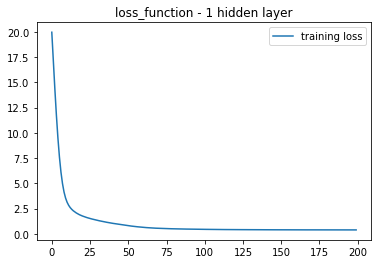

In [8]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["training loss"])
plt.show()

## Define a model with 2 hidden layers

In [9]:
# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()

# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(
    Dense(units=hidden_nodes_layer2, activation="relu")
)

# Output layer
nn.add(
    Dense(units=1, activation="linear")
)

In [11]:
# Model summary
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 0s 3ms/step - loss: 32.5273 - mse: 32.5273 - val_loss: 33.0656 - val_mse: 33.0656
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 28.7314 - mse: 28.7314 - val_loss: 29.6115 - val_mse: 29.6115
Epoch 3/200
35/35 [==============================] - 0s 1ms/step - loss: 25.5598 - mse: 25.5598 - val_loss: 26.9418 - val_mse: 26.9418
Epoch 4/200
35/35 [==============================] - 0s 1ms/step - loss: 22.4224 - mse: 22.4224 - val_loss: 24.5908 - val_mse: 24.5908
Epoch 5/200
35/35 [==============================] - 0s 1ms/step - loss: 19.3199 - mse: 19.3199 - val_loss: 22.0480 - val_mse: 22.0480
Epoch 6/200
35/35 [==============================] - 0s 1ms/step - loss: 16.1316 - mse: 16.1316 - val_loss: 19.2083 - val_mse: 19.2083
Epoch 7/200
35/35 [==============================] - 0s 1ms/step - loss: 13.1480 - mse: 13.1480 - val_loss: 16.1024 - val_mse: 16.1024
Epoch 8/200
35/35 [==============================] - 0s

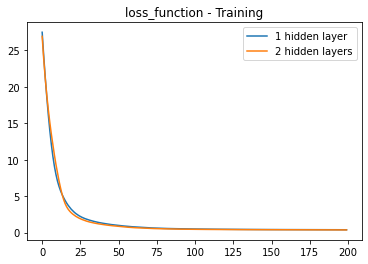

In [15]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

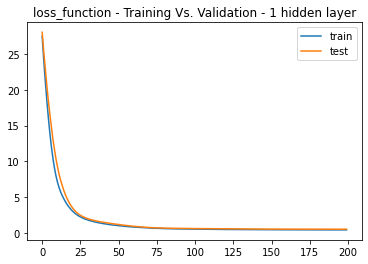

In [16]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

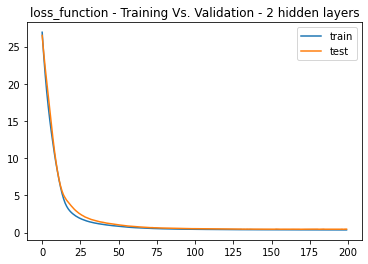

In [17]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()